<a href="https://colab.research.google.com/github/MehediAzim/Simulation-and-modeling/blob/master/Inventory_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math  
np.random.seed(1)

#Initialization

In [ ]:
print("Enter Maximum capacity")
M = input()
print("Enter Review Period")
N = input()

Enter Maximum capacity
11
Enter Review Period
5


In [ ]:
m = int(M)   #maximum capacity of inventory 
n = int(N)    #review period in days 

cycle_num = 10

#Initialization Day - 0 
begining_inventory = 3  
ending_inventory = 0
shortage_quantity = 0 
order_quantity = 8
days_until_order_arrives = 2

demands=  np.random.choice(a = [0,1,2,3,4] , size = cycle_num * n,p = [0.10,0.25,0.35,0.21,0.09]) #randomly  np.random.choice(a=[],size=100,p=[])
demands = demands.tolist()
lead_time_days = np.random.choice(a = [0,1,2] , size = cycle_num ,p = [0.6,0.3,0.1]) # a is list of outcomes, p is list of their probabilities
lead_time_days = lead_time_days.tolist()


In [ ]:
print(len(demands),demands)
print(len(lead_time_days),lead_time_days)

50 [2, 3, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 3, 0, 2, 2, 2, 1, 1, 3, 4, 1, 2, 3, 3, 0, 0, 1, 3, 0, 2, 4, 2, 2, 1, 2, 3, 0, 3, 4, 3, 1, 3, 1, 2, 3, 1, 1, 1]
10 [0, 1, 0, 0, 0, 0, 0, 0, 0, 1]


#Inventory System

In [ ]:
ending_inventories = []
shortage_days = 0
print("\t\tBegining_inventory\tDemand\t\tEnding_inventory\tShortage_quantity\tOrder_quantity\tdays_until_order_arrives")


for cycle in range(1,cycle_num+1):
  print("\nCycle No:" +str(cycle),end = "")
  print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
  
  for day in range(1, n+1):
    #refill begining inventory after days_until_order_arrives = 0
    if(days_until_order_arrives>= 0):
      days_until_order_arrives -= 1

    if(days_until_order_arrives < 0):
      begining_inventory += order_quantity
      order_quantity = 0

    print(" Day No: "+str(day),end = "")
    demand = demands.pop(0)
    total_demand= demand+shortage_quantity

    if total_demand>begining_inventory:
      ending_inventory = 0
      shortage_quantity = total_demand - begining_inventory
      shortage_days += 1 
    else:
      ending_inventory = begining_inventory - total_demand
      shortage_quantity = 0
    print("\t"+str(begining_inventory),end = "")

    begining_inventory = ending_inventory

    ending_inventories.append(ending_inventory)


    if (day == n):
      lead_time = lead_time_days.pop(0)
      days_until_order_arrives = lead_time
      order_quantity = m - ending_inventory
    
    print("\t\t\t"+str(demand)+"\t\t"+str(ending_inventory)+"\t\t\t"+str(shortage_quantity),end = "")
    if (day == n):
      print(" \t\t\t"+str(order_quantity),end = "")
    else:
      print(" \t\t\t-",end = "")
    
    if(days_until_order_arrives == -1):
      print(" \t\t\t -") 
    else:
      print("\t\t\t "+str(days_until_order_arrives))
  #end inner for loop 
  
#end outer for loop

		Begining_inventory	Demand		Ending_inventory	Shortage_quantity	Order_quantity	days_until_order_arrives

Cycle No:1---------------------------------------------------------------------------------------------------------------------------------------------------------
 Day No: 1	3			2		1			0 			-			 1
 Day No: 2	1			3		0			2 			-			 0
 Day No: 3	8			0		6			0 			- 			 -
 Day No: 4	6			1		5			0 			- 			 -
 Day No: 5	5			1		4			0 			7			 0

Cycle No:2---------------------------------------------------------------------------------------------------------------------------------------------------------
 Day No: 1	11			0		11			0 			- 			 -
 Day No: 2	11			1		10			0 			- 			 -
 Day No: 3	10			1		9			0 			- 			 -
 Day No: 4	9			2		7			0 			- 			 -
 Day No: 5	7			2		5			0 			6			 1

Cycle No:3---------------------------------------------------------------------------------------------------------------------------------------------------------
 Day No: 1	5			2		3			0 			-			 0
 Day No: 2	9			2

In [ ]:
print("Average Ending Inventories : ", sum(ending_inventories)/len(ending_inventories))
print("Shortage occurs in "+str(shortage_days)+" days")

Average Ending Inventories :  4.88
Shortage occurs in 3 days


#Visualization

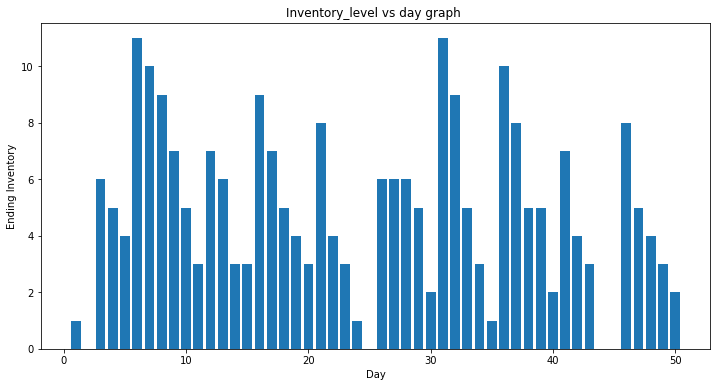

In [ ]:
plt.figure(figsize=(12,6))
days = range(1,cycle*n+1)
plt.bar(days,ending_inventories) 
plt.xlabel('Day') 
plt.ylabel('Ending Inventory') 
plt.title("Inventory_level vs day graph ") 
plt.show() 